In [1]:
import mask
import imp
imp.reload(mask)
n = [1.0,2.0,-3.0,2.0,2.0,-3.4,2.0,-2.0,1.0]
my_mask = mask.Mask(n)

print(my_mask.mask)
print(my_mask.mask_info)

my_mask.calculate_new_mask_turning_points([0.,1.0,0.0],(0.5,0.5),())

['l', 'l', 'b', 'd', 'd', 'b', 'd', 'b', 'l']
{'l0': (0, 1), 'd1': (6, 6), 'd0': (3, 4), 'b1': (5, 5), 'l1': (8, 8), 'b0': (2, 2), 'b2': (7, 7), 'num_dot': 2}


In [4]:
# testbed for the standalone mask module
import mask
import imp
imp.reload(mask)

n = [1.0,2.0,-3.0,2.0,2.0,-3.4,2.0,-2.0,1.0]
my_mask = mask.Mask(n)
imp.reload(mask)
my_mask.calculate_new_mask_turning_points([0.,1.0,0.0,3.0,0.0],[0.5,0.5],[2])
print(my_mask.mask)

Mask creation failed from turning points.
['l', 'b', 'b', 'b', 'l']


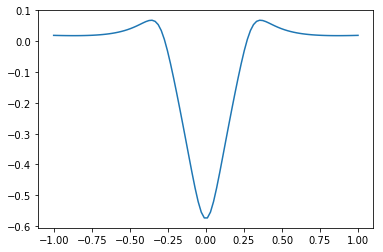

In [33]:
# testbed for the standalone physics module
import mask
import imp
imp.reload(mask)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imp
import potential_profile
imp.reload(potential_profile)
import physics
imp.reload(physics)

E_scale = 'eV'
dx_scale = '1e-9'

kT = 100e-6
x = np.linspace(-1,1,100)
#x = np.array([1,2,3,4,5])
b1 = (-200e-3,-0.3,0.1,1)
d = (450e-3,0.0,0.1,1)
b2 = (-200e-3,0.3,0.1,1)
V = potential_profile.V_x_wire(x,[b1,d,b2])
#V = np.array([0.0,100e-3,5e-3,100e-3,0.0])
K_onsite = 1e-3
sigma = x[1] - x[0]

mu_l = (50e-3,50e-3)
model_physics = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,mu_l)

import physics
my_phys = physics.Physics(model_physics)

plt.plot(x,V)


In [34]:
# testbed for the ThomasFermi module
import thomas_fermi
imp.reload(thomas_fermi)

my_tf = thomas_fermi.ThomasFermi(model_physics)
num_dot,prelim_mask = my_tf.find_n_dot_estimate()

mu_d = [my_tf.mu_l[0]]*num_dot
n,N_d = my_tf.tf_iterative_solver_fixed_mu(prelim_mask,mu_d)
print(N_d)
N_est = [int(x) for x in N_d]
print(N_est)
n,mu_d = my_tf.tf_iterative_solver_fixed_N(prelim_mask,N_est)
print(mu_d)

[ 28.61106488]
[28]
[ 0.04427643]


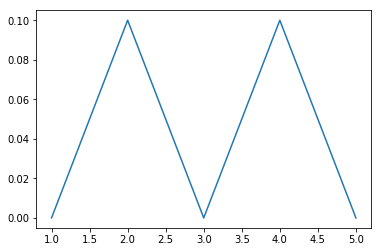

In [16]:
# testbed for potential_profile

import matplotlib.pyplot as plt
%matplotlib inline



plt.plot(x,V)

In [66]:
%pdb

Automatic pdb calling has been turned ON


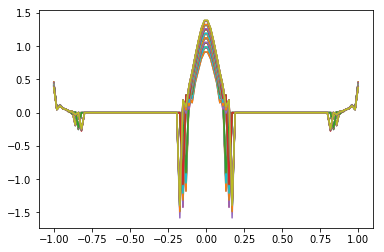

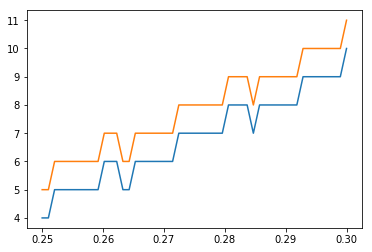

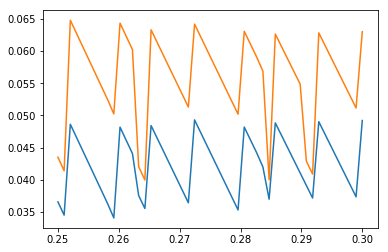

In [41]:
# mu_d plot
from IPython import display
import time

V_d_vec = np.linspace(250e-3,300e-3,50)
N_d_vec = np.zeros((3,len(V_d_vec)))
mu_d_vec = np.zeros((3,len(V_d_vec)))
dot_size = np.zeros(len(V_d_vec))
for i in range(len(V_d_vec)):
    b1 = (-200e-3,-0.3,0.1,1)
    d = (V_d_vec[i],0.0,0.1,1)
    b2 = (-200e-3,0.3,0.1,1)
    V = potential_profile.V_x_wire(x,[b1,d,b2])
    
    my_tf.V = V
    
    num_dot,prelim_mask = my_tf.find_n_dot_estimate()

    dot_size[i] = prelim_mask.mask.count('d')
    mu_d = [my_tf.mu_l[0]]*num_dot
    n,N_d = my_tf.tf_iterative_solver_fixed_mu(prelim_mask,mu_d)
    
    N_est = [int(x) for x in N_d]
    n,mu_d = my_tf.tf_iterative_solver_fixed_N(prelim_mask,N_est)
    N_est1 = [int(x)+1 for x in N_d]
    n1,mu_d1 = my_tf.tf_iterative_solver_fixed_N(prelim_mask,N_est1)
    print(mu_d,mu_d1)
    #N_est2 = [int(x)-1 for x in N_d]
    #n2,mu_d2 = my_tf.tf_iterative_solver_fixed_N(prelim_mask,N_est2)
    
    N_d_vec[0,i] = N_est[0]
    mu_d_vec[0,i] = mu_d
    N_d_vec[1,i] = N_est1[0]
    mu_d_vec[1,i] = mu_d1
    N_d_vec[2,i] = N_est2[0]
    mu_d_vec[2,i] = mu_d2
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)
    plt.figure(3)
    plt.plot(my_tf.x,n)
    
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot(V_d_vec,N_d_vec[0,:])
plt.plot(V_d_vec,N_d_vec[1,:])
plt.figure(2)
plt.plot(V_d_vec,mu_d_vec[0,:])
plt.plot(V_d_vec,mu_d_vec[1,:])



In [19]:
%pdb

Automatic pdb calling has been turned ON
